# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Check out the Train Data

In [2]:
train_df=pd.read_excel("Data_file.xlsx",header=2)

In [3]:
train_df.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous CTC          1338 non-null   int64  
 5   Previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


In [5]:
train_df.shape

(1338, 9)

In [6]:
train_df=train_df.drop('S.No.', axis=1)
train_df.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


## Check for missing values

In [7]:
train_df.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

## Check for duplicate records

In [8]:
print(f'Duplicates in dataset: {train_df.duplicated().sum()},({np.round(100*train_df.duplicated().sum()/len(train_df),1)}%)')

Duplicates in dataset: 0,(0.0%)


## Separate numerical and categorical variables

In [9]:
numerical=[]
for col in train_df.columns:
    if train_df[col].dtypes!='O':
        numerical.append(col)
print(numerical)

['Previous CTC', 'Previous job changes', 'Graduation marks', 'Exp (Months)', 'CTC']


In [10]:
categorical=[]
for col in train_df.columns:
    if train_df[col].dtypes=='O':
        categorical.append(col)
print(categorical)

['College', 'Role', 'City type']


# EDA

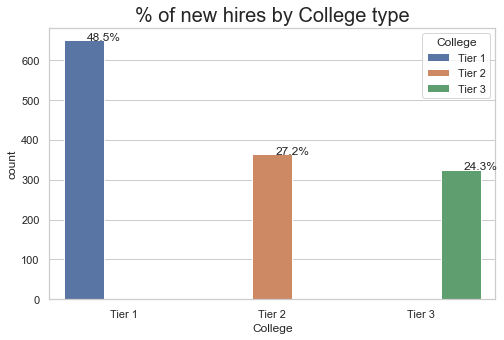

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_df))
ax = sns.countplot(x="College", hue="College", data=train_df)
plt.title('% of new hires by College type', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

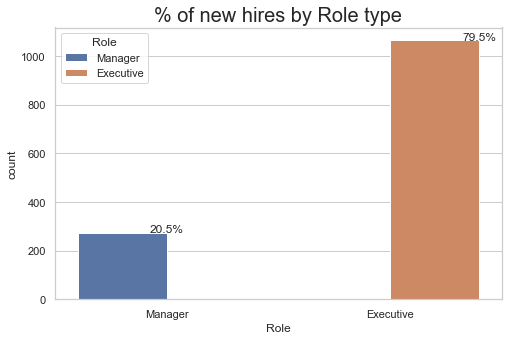

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_df))
ax = sns.countplot(x="Role", hue="Role", data=train_df)
plt.title('% of new hires by Role type', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

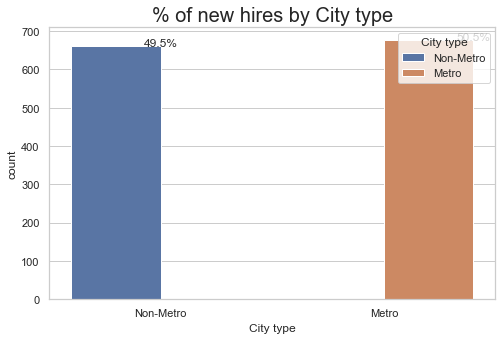

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_df))
ax = sns.countplot(x="City type", hue="City type", data=train_df)
plt.title('% of new hires by City type', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

<AxesSubplot:xlabel='College', ylabel='CTC'>

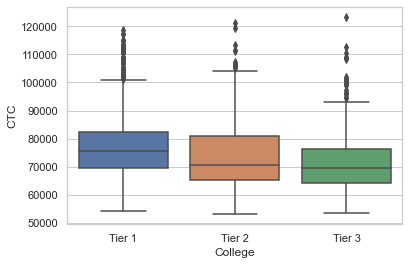

In [16]:
sns.boxplot(x=train_df.College, y=train_df.CTC)

<AxesSubplot:xlabel='Role', ylabel='CTC'>

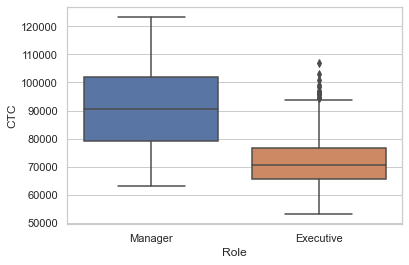

In [17]:
sns.boxplot(x=train_df.Role, y=train_df.CTC)

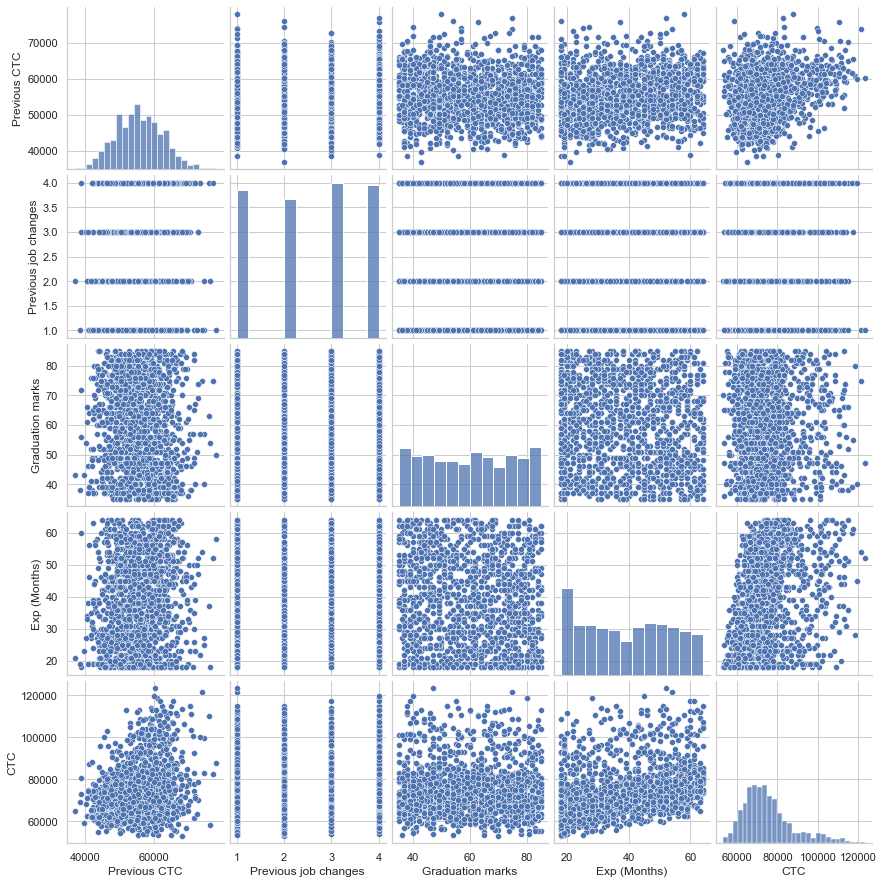

In [18]:
sns.pairplot(train_df)

## Convert categorical variables to numerical

In [19]:
train_df=pd.get_dummies(train_df, drop_first=True)

In [20]:
train_df.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0


<AxesSubplot:>

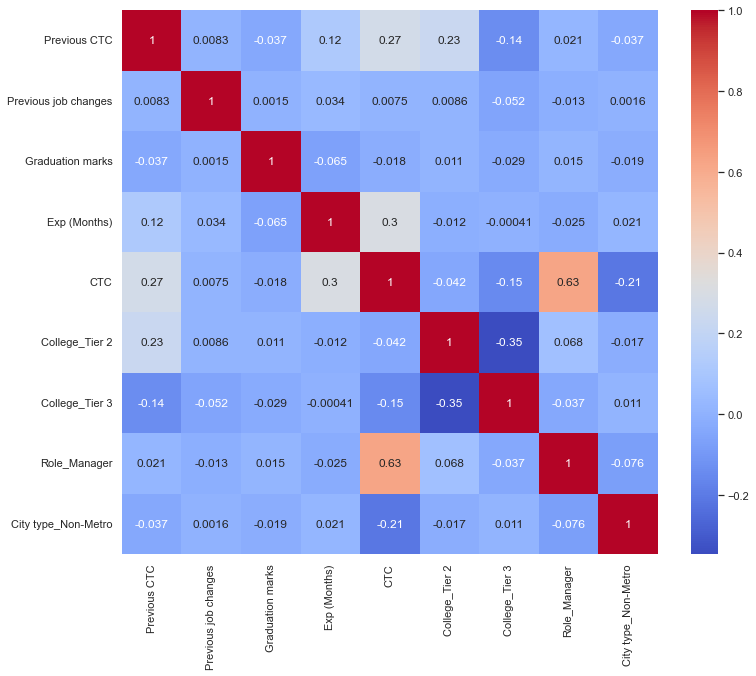

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr() ,cmap='coolwarm', linecolor='white', annot=True)

# Training a Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
X_train=train_df.drop('CTC',axis=1)
y_train=train_df['CTC']

In [24]:
linearmodel=LinearRegression()
linearmodel.fit(X_train, y_train)

LinearRegression()

# Check out the Test Data

In [25]:
test_df=pd.read_excel("Test_data_file.xlsx")

In [26]:
test_df.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   College_T1            1338 non-null   int64  
 4   College_T2            1338 non-null   int64  
 5   Role_Manager          1338 non-null   int64  
 6   City_Metro            1338 non-null   int64  
 7   previous CTC          1338 non-null   int64  
 8   previous job changes  1338 non-null   int64  
 9   Graduation marks      1338 non-null   int64  
 10  Exp                   1338 non-null   int64  
 11  Actual CTC            1338 non-null   float64
 12  Predicted CTC         0 non-null      float64
 13  Unnamed: 13           0 non-null      float64
 14  Unnamed: 14           0 non-null      float64
 15  Unnamed: 15          

In [28]:
test_df=test_df.iloc[:,:12]

In [29]:
test_df.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729


In [30]:
test_df=test_df[['College','Role','City type','previous CTC','previous job changes','Graduation marks','Exp','Actual CTC']]
test_df.head()

,College,Role,City type,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


## Convert categorical variables to numerical

In [31]:
test_df=pd.get_dummies(test_df,drop_first=True)
test_df.head()

,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0


In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   previous CTC          1338 non-null   int64  
 1   previous job changes  1338 non-null   int64  
 2   Graduation marks      1338 non-null   int64  
 3   Exp                   1338 non-null   int64  
 4   Actual CTC            1338 non-null   float64
 5   College_Tier 2        1338 non-null   uint8  
 6   College_Tier 3        1338 non-null   uint8  
 7   Role_Manager          1338 non-null   uint8  
 8   City type_Non-Metro   1338 non-null   uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 57.6 KB


In [33]:
X_test=test_df.drop('Actual CTC',axis=1)
y_test=test_df['Actual CTC']

## Predictions from our Model

In [34]:
predictions=linearmodel.predict(X_test)

# Model Evaluation

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
print("R2 score: ",r2_score(y_test,predictions))

R2 score:  0.6081873160506195


In [37]:
print("Mean squared error: ", mean_squared_error(y_test,predictions))

Mean squared error:  61677937.04530962


In [38]:
result_df=pd.concat([test_df, pd.DataFrame(predictions, columns=["Predicted CTC"])], axis=1)

In [39]:
result_df=result_df[["previous CTC", "previous job changes", "Graduation marks", "Exp", "College_Tier 2", "College_Tier 3"
                    ,"Role_Manager", "City type_Non-Metro", "Actual CTC", "Predicted CTC"]]
result_df.head()

,previous CTC,previous job changes,Graduation marks,Exp,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro,Actual CTC,Predicted CTC
0,55523,3,66,19,0,0,1,1,71406.576531,86123.938140
1,57081,1,84,18,1,0,0,0,68005.870631,65789.546527
2,60347,2,52,28,1,0,0,0,76764.020277,69941.690302
3,49010,2,81,33,0,1,0,0,82092.386880,66843.038384
4,57879,4,74,32,0,1,0,0,73878.097729,70556.761762
